In [48]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

## Data Source
The data used in this Jupyter Notebook is from the [HYG Database version 3](http://www.astronexus.com/hyg) by David Nash. 

In [49]:
df = pd.read_csv('./data/hygdata_v3/hygdata_v3.csv', low_memory=False)
display(df.head())

# Remove the sun because it doesn't make sense in a star chart
df = df[df['proper'] != 'Sol']

# Translate plaintext Bayer designations into non-ASCII greek letters
greek_dict = {'Alp': u"α",'Bet': u"β",'Chi': u"χ",'Del': u"δ",'Eps': u"ε",'Eta': u"η",
              'Gam': u"γ",'Iot': u"ι",'Kap': u"κ",'Lam': u"λ",'Mu': u"μ",'Nu': u"ν",
              'Ome': u"ω",'Omi': u"ο",'Phi': u"φ",'Pi': u"π",'Psi': u"ψ",'Rho': u"ρ",
              'Sig': u"σ",'Tau': u"τ",'The': u"θ",'Ups': u"υ",'Xi': u"ξ",'Zet': u"ζ"}

print(df[pd.notnull(df['bayer'])]['bayer'].unique())
def get_greek_letter(n):
    if str(n) == 'nan':
        return(np.nan)
    split = n.split("-")
    greek = greek_dict.get(split[0])
    if len(split) > 1:
        r = greek + split[1]
    else: 
        r = greek
    return(r)

df['greek_letters'] = df['bayer'].apply(get_greek_letter)
display(df.head())

print(len(df[pd.notnull(df['spect'])]['spect'].unique()), 'unique spectral designations')
def get_first_letter(name):
    '''Preprocess spectral designations to remove numbers'''
    if str(name) != 'nan':
        if len(name) > 1:
            if name[0:2] == 'sd':
                # remove MK system luminosity class to look just at
                # Morgan-Keenan designations
                name = name[2::]
            alphas = ''.join(c for c in name if c not in '?:!/;.,[]{}()')
            return(alphas[0].upper())
        else:
            return(name.upper())
    return(name)
    
df['dist'].replace(to_replace=100000, value=np.nan, inplace=True)
    
df['spect_desig'] = df['spect'].apply(get_first_letter)    
print(len(df[pd.notnull(df['spect_desig'])]['spect_desig'].unique()), 'unique spectral designations')
print(df[pd.notnull(df['spect_desig'])]['spect_desig'].unique())

color_dict = { 
    'O':'#5A90C3', 'B':'#93C2F1', 'A':'#f3e8d3', 'F':'#d4bf94',
    'G':'#FFD423', 'K':'#F99220', 'M':'#FF2620',  'L':'#FF2620',
    'T':'#FF6199', 'Y':'#6B22FF', 
    'C':'#979330', 'R':'#979330', 'W':'#979330', 'N':'#979330',
    'S':'#979330', 'D':'#979330', 'P':'#979330',
    'nan': '#000000' # unknown
}
df['color'] = df['spect_desig'].replace(to_replace=color_dict)
df['color'] = df['color'].replace(to_replace=np.nan, value='#000000')
df['linecolor'] = df['color'].replace(['#000000'], ['#f3e8d3']) # beige outline for black NANs

display(df.head())
df.to_csv('./data/processed/hygdata_processed.csv', index=False)

print(len(df), 'total stars available in database')
df = df[df['mag'] <= 6.5]
print(len(df), 'stars visible to the human eye')
df.to_csv('./data/processed/hygdata_processed_mag65.csv', index=False)

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN


['Tau' 'The' 'Zet' 'Alp' 'Bet' 'Kap-1' 'Eps' 'Gam-3' 'Kap-2' 'Gam' 'Chi'
 'Sig' 'Iot' 'Pi' 'Rho' 'Kap' 'Eta' 'Lam-1' 'Bet-1' 'Bet-2' 'Lam' 'Bet-3'
 'Lam-2' 'Del' 'Mu' 'Xi' 'Phi-1' 'Omi' 'Nu' 'Phi-2' 'Ups-1' 'Phi-3'
 'Ups-2' 'Phi-4' 'Ome' 'Psi-1' 'Ups' 'Psi-2' 'Phi' 'Psi-3' 'Psi' 'Tau-1'
 'Tau-2' 'Eta-1' 'Gam-2' 'Eta-2' 'Gam-1' 'Xi-1' 'Pi-1' 'Pi-2' 'Xi-2'
 'Iot-1' 'Iot-2' 'Eta-3' 'Rho-1' 'Rho-2' 'Rho-3' 'The-1' 'Tau-3' 'Zet-1'
 'Zet-2' 'Tau-4' 'Chi-1' 'Chi-2' 'Chi-3' 'Tau-5' 'Tau-6' 'Tau-7' 'Tau-8'
 'Tau-9' 'Ome-1' 'Omi-1' 'Omi-2' 'Ome-2' 'Ups-4' 'Del-1' 'Del-2' 'Del-3'
 'The-2' 'Sig-1' 'Sig-2' 'Pi-3' 'Pi-4' 'Pi-5' 'Pi-6' 'Nu-1' 'Nu-2' 'Nu-3'
 'Psi-4' 'Psi-5' 'Psi-6' 'Psi-7' 'Psi-8' 'Psi-9' 'Mu-1' 'Mu-2' 'Sig-3'
 'Alp-1' 'Alp-2' 'Zet-3' 'Zet-4' 'Eps-1' 'Eps-2']


,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,flam,con,comp,comp_primary,base,lum,var,var_min,var_max,greek_letters
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN,NaN
5,5,5.0,224705.0,NaN,NaN,NaN,NaN,0.000665,-40.591202,257.7320,...,NaN,Phe,1,5,NaN,21.998851,NaN,NaN,NaN,NaN


4307 unique spectral designations
14 unique spectral designations
['F' 'K' 'B' 'G' 'M' 'A' 'C' 'R' 'O' 'W' 'N' 'S' 'D' 'P']


,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,comp_primary,base,lum,var,var_min,var_max,greek_letters,spect_desig,color,linecolor
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,1,NaN,9.638290,NaN,NaN,NaN,NaN,F,#d4bf94,#d4bf94
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,2,NaN,0.392283,NaN,NaN,NaN,NaN,K,#F99220,#F99220
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,3,NaN,386.901132,NaN,NaN,NaN,NaN,B,#93C2F1,#93C2F1
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,4,NaN,9.366989,NaN,NaN,NaN,NaN,F,#d4bf94,#d4bf94
5,5,5.0,224705.0,NaN,NaN,NaN,NaN,0.000665,-40.591202,257.7320,...,5,NaN,21.998851,NaN,NaN,NaN,NaN,G,#FFD423,#FFD423


119613 total stars available in database
8912 stars visible to the human eye


## Data Source
The asterism data used in this Jupyter Notebook is from the open-source [Stellarium Astronomy Software](https://stellarium.org/). 

In [50]:
df = pd.read_csv('./data/stellarium_western_asterisms/constellationship.fab', header=None)
df['constellation'] = df[0].str.split().str.get(0)
df['num_pairs'] = df[0].str.split().str.get(1)
df['stars'] = df[0].str.split().str[2:]
df.drop(0, axis=1, inplace=True)
display(df.head())

df_names = pd.read_csv('./data/stellarium_western_asterisms/constellation_names.eng.fab', header=None)
df_names = df_names[0].str.replace('\t', '').str.split('"', expand=True)
df_names.drop([2, 3, 4], axis=1, inplace=True)
df_names.columns = ['constellation', 'name']
display(df_names.head())

assert len(df) == len(df_names)
df = pd.merge(df, df_names, on="constellation")
display(df.head())

,constellation,num_pairs,stars
0,Aql,8,"[98036, 97649, 97649, 97278, 97649, 95501, 955..."
1,And,5,"[677, 3092, 3092, 5447, 9640, 5447, 5447, 4436..."
2,Scl,3,"[116231, 4577, 4577, 115102, 115102, 116231]"
3,Ara,7,"[88714, 85792, 85792, 83081, 83081, 82363, 823..."
4,Lib,5,"[77853, 76333, 76333, 74785, 74785, 72622, 726..."


,constellation,name
0,Aql,Aquila
1,And,Andromeda
2,Scl,Sculptor
3,Ara,Ara
4,Lib,Libra


,constellation,num_pairs,stars,name
0,Aql,8,"[98036, 97649, 97649, 97278, 97649, 95501, 955...",Aquila
1,And,5,"[677, 3092, 3092, 5447, 9640, 5447, 5447, 4436...",Andromeda
2,Scl,3,"[116231, 4577, 4577, 115102, 115102, 116231]",Sculptor
3,Ara,7,"[88714, 85792, 85792, 83081, 83081, 82363, 823...",Ara
4,Lib,5,"[77853, 76333, 76333, 74785, 74785, 72622, 726...",Libra


In [51]:
stars = [float(y) for x in df['stars'].tolist() for y in x]
stars = sorted(set(stars))

hip_df = pd.read_csv('./data/processed/hygdata_processed.csv', low_memory=False)
ras, decs, = [], []
for star in stars: 
    temp = hip_df[hip_df['hip']==star]
    assert len(temp) == 1
    ras.append(temp['ra'].tolist()[0])
    decs.append(temp['dec'].tolist()[0])

star_df = pd.DataFrame(data={'star_ID':stars, 'ra':ras, 'dec':decs})
display(star_df.head())

,star_ID,ra,dec
0,677.0,0.139791,29.090432
1,746.0,0.152887,59.149780
2,765.0,0.156836,-45.747426
3,1067.0,0.220598,15.183596
4,1562.0,0.323799,-8.823921


In [52]:
df['ra'] = ''
df['dec'] = ''

for index, row in df.iterrows(): 
    ras, decs = [], []
    for star in row['stars']: 
        temp = hip_df[hip_df['hip']==float(star)]
        assert len(temp) == 1
        ras.append(temp['ra'].tolist()[0])
        decs.append(temp['dec'].tolist()[0])
    df.at[index, 'ra'] = ras
    df.at[index, 'dec'] = decs
    
display(df.head())

,constellation,num_pairs,stars,name,ra,dec
0,Aql,8,"[98036, 97649, 97649, 97278, 97649, 95501, 955...",Aquila,"[19.921887, 19.846388, 19.846388, 19.770994, 1...","[6.406763, 8.868322000000003, 8.86832200000000..."
1,And,5,"[677, 3092, 3092, 5447, 9640, 5447, 5447, 4436...",Andromeda,"[0.139791, 0.655462, 0.655462, 1.162194, 2.064...","[29.090432, 30.861024, 30.861024, 35.620558, 4..."
2,Scl,3,"[116231, 4577, 4577, 115102, 115102, 116231]",Sculptor,"[23.549512, 0.976766, 0.976766, 23.313733, 23....","[-37.818268, -29.357449, -29.357449, -32.53202..."
3,Ara,7,"[88714, 85792, 85792, 83081, 83081, 82363, 823...",Ara,"[18.11052, 17.530695, 17.530695, 16.977006, 16...","[-50.09147700000001, -49.876145, -49.876145, -..."
4,Lib,5,"[77853, 76333, 76333, 74785, 74785, 72622, 726...",Libra,"[15.897093, 15.592104999999998, 15.59210499999...","[-16.729293, -14.789537, -14.789537, -9.382917..."


In [53]:
zodiacs = ['Aquarius', 'Aries', 'Cancer', 'Capricornus', 'Gemini', 'Leo', 'Libra', 
           'Pisces', 'Sagittarius', 'Scorpius', 'Taurus', 'Virgo']
df['zodiac'] = df['name'].isin(zodiacs)
assert df['zodiac'].sum() == 12
display(df.head())
df.to_csv('./data/processed/asterisms.csv', index=False)

,constellation,num_pairs,stars,name,ra,dec,zodiac
0,Aql,8,"[98036, 97649, 97649, 97278, 97649, 95501, 955...",Aquila,"[19.921887, 19.846388, 19.846388, 19.770994, 1...","[6.406763, 8.868322000000003, 8.86832200000000...",False
1,And,5,"[677, 3092, 3092, 5447, 9640, 5447, 5447, 4436...",Andromeda,"[0.139791, 0.655462, 0.655462, 1.162194, 2.064...","[29.090432, 30.861024, 30.861024, 35.620558, 4...",False
2,Scl,3,"[116231, 4577, 4577, 115102, 115102, 116231]",Sculptor,"[23.549512, 0.976766, 0.976766, 23.313733, 23....","[-37.818268, -29.357449, -29.357449, -32.53202...",False
3,Ara,7,"[88714, 85792, 85792, 83081, 83081, 82363, 823...",Ara,"[18.11052, 17.530695, 17.530695, 16.977006, 16...","[-50.09147700000001, -49.876145, -49.876145, -...",False
4,Lib,5,"[77853, 76333, 76333, 74785, 74785, 72622, 726...",Libra,"[15.897093, 15.592104999999998, 15.59210499999...","[-16.729293, -14.789537, -14.789537, -9.382917...",True


## Data Source
The data used in this Jupyter Notebook is from the 1989 [Catalogue of Constellation Boundary Data](http://cdsarc.u-strasbg.fr/viz-bin/Cat?VI/49#sRM2.2) by A.C. Davenhall and S.K. Leggett, and was used with permission from the Royal Observatory Edinburgh.

In [54]:
colwidths = [11, 11, 5, 100]
colnames = ['right_ascension_hours', 'declination_degrees', 'const_abbreviation', 'type_point']

df = pd.read_fwf('./data/VI_49/bound_20.dat', widths=colwidths, names=colnames)
display(df.head())

const, ras, decs = [], [], []

for name, group in df.groupby('const_abbreviation'):
    const.append(name)
    ras.append(group['right_ascension_hours'].tolist())
    decs.append(group['declination_degrees'].tolist())
    
df_ra_dec = pd.DataFrame(data={'name':const, 'ra':ras, 'dec':decs})
display(df_ra_dec.head())

savename = './data/processed/constellations.csv'
df_ra_dec.to_csv('./data/processed/constellations.csv', index=False)

,right_ascension_hours,declination_degrees,const_abbreviation,type_point
0,23.535713,35.189774,AND,I
1,23.468492,35.188026,AND,I
2,23.401264,35.186070,AND,I
3,23.334036,35.183899,AND,I
4,23.266823,35.181519,AND,I


,name,ra,dec
0,AND,"[23.5357132, 23.4684925, 23.4012642, 23.334035...","[35.1897736, 35.1880264, 35.1860695, 35.183898..."
1,ANT,"[9.7783384, 9.711378100000001, 9.6444119999999...","[-24.5768433, -24.569940600000002, -24.5628623..."
2,APS,"[13.858232500000002, 13.8653402, 13.8736773000...","[-76.62335209999999, -77.6230698, -78.6227417,..."
3,AQL,"[18.692411399999997, 18.6916103, 18.6908112, 1...","[-2.8842952, -1.8843668999999998, -0.884438800..."
4,AQR,"[20.645000500000002, 20.6443596, 20.6437206, 2...","[-7.563462299999999, -6.563508000000001, -5.56..."


## Data Source
The data in this `CSV` file was manually entered by hand using W.H. Finlay's [Concise Catalog of Deep-sky Objects](https://www.springer.com/us/book/9781852338510) as a reference text. All objects in the book with a magnitude less than 6.5 was included in the `CSV` file. 

In [55]:
df = pd.read_csv('./data/messier_ngc.csv')

df['ra_h'] = df['ra'].str.split("h ").str.get(0).astype(int)
df['ra_min'] = df['ra'].str.split("h ").str.get(1).str.replace("m", "").astype(float)
df['ra_original'] = df['ra'].copy()
df['ra'] = df['ra_h'] + df['ra_min']/60

df['dec_sign'] = df['dec'].str.get(0)
df['dec_degrees'] = np.abs(df['dec'].str.split("d").str.get(0).astype(int))
df['dec_seconds'] = df['dec'].str.split("d ").str.get(1).str.replace("'", "").astype(float)
df['dec_original'] = df['dec'].copy()
df['dec'] = df['dec_degrees'] + df['dec_seconds']/60
df['dec'] = df['dec_sign'] + df['dec'].astype(str)
df['dec'] = df['dec'].astype(float)
df.drop(['ra_h', 'ra_min', 'dec_sign', 'dec_degrees', 'dec_seconds'], axis=1, inplace=True)

print(df['type'].unique())
unicodes = {'open cluster': u"\u16b8", 'globular cluster': u"\u2724",
            'emission nebula': u"\u16e5", "star cloud": u"\u2388", "spiral galaxy": u"\u214f", 
            "planetary nebula": u"\u16bb", 'emission nebula, open cluster': u"\u25c8"}
df['code'] = df['type'].replace(unicodes)

# df['name_2'] = df['proper_name'].replace(np.nan, df['name'])

df.to_csv('./data/processed/messier_ngc_processed.csv', index=False)
df.head()

['open cluster' 'globular cluster' 'emission nebula, open cluster'
 'emission nebula' 'star cloud' 'spiral galaxy']


,name,type,ra,dec,magnitude,proper_name,ra_original,dec_original,code
0,M11,open cluster,18.851667,-6.266667,5.8,Wild Duck Cluster,18h 51.1m,-6d 16',ᚸ
1,M13,globular cluster,16.695000,36.466667,5.8,Hercules Cluster,16h 41.7m,+36d 28',✤
2,M15,globular cluster,21.500000,12.166667,6.2,NaN,21h 30m,+12d 10',✤
3,M16,open cluster,18.313333,-13.783333,6.0,Eagle Nebula,18h 18.8m,-13d 47',ᚸ
4,M17,"emission nebula, open cluster",18.346667,-16.183333,6.0,Swan Nebula,18h 20.8m,-16d 11',◈


## Code Description

This code makes reference plots to use when illustrating individual asterisms. These illustrated drawings can be found in the bottom right of the [finished map](http://tabletopwhale.com/img/posts/19-07-15.jpg). The original map uses [Western Constellation lines](http://hemel.waarnemen.com/download/#cetera) by Marc van der Sluys, but this code file uses the same Stellarium asterism data as in `2_process_asterism_data`.

In [56]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
stars = stars[stars['mag'] <= 6.5]
asterisms = pd.read_csv('./data/processed/asterisms.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
names = ['Scorpius', 'Cancer', 'Corona Borealis', 'Crater', 
         'Lepus', 'Gemini', 'Cygnus', 'Sagittarius']
gap = 30

<ipython-input-57-d9fc4e05bee0>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(np.sqrt(len(name))), np.ceil(np.sqrt(len(name))), i+1,
<ipython-input-57-d9fc4e05bee0>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(np.sqrt(len(name))), np.ceil(np.sqrt(len(name))), i+1,
<ipython-input-57-d9fc4e05bee0>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(np.sqrt(len(name))), np.ceil(np.sqrt(len(name))), i+1,
<ipython-input-57-d9fc4e05bee0>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and 

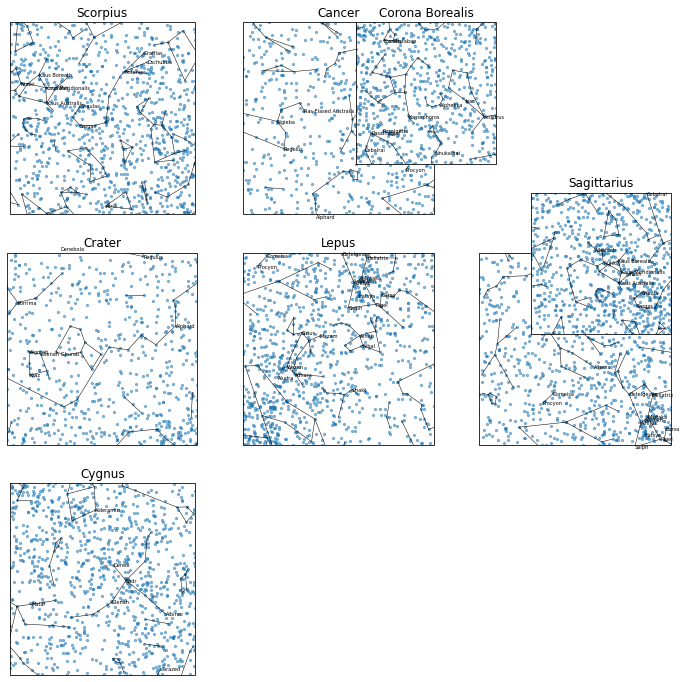

In [57]:
fig = plt.figure(figsize=(12, 12))

for i, name in enumerate(names): 
    valdf = const_names[const_names['name'] == name]
    clon = 360/24*valdf['ra'].tolist()[0]
    clat = valdf['dec'].tolist()[0]

    ax = fig.add_subplot(np.ceil(np.sqrt(len(name))), np.ceil(np.sqrt(len(name))), i+1, 
                         projection=ccrs.Orthographic(central_longitude=clon, central_latitude=clat)) 
    ax.set_extent([clon-gap, clon+gap, clat+gap, clat-gap], ccrs.PlateCarree())
    for index, row in asterisms.iterrows():
        ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
        decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
        for n in range(int(len(asterisms)/2)):
            ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color='k', lw=0.5)

    ax.set_title(name)
    ax.scatter(360/24*stars['ra'], stars['dec'], transform=ccrs.Geodetic(), s=5, alpha=0.5)
    stars_names = stars[pd.notnull(stars['proper'])]
    stars_names = stars_names[stars_names['dec'].between(clat-gap, clat+gap)]
    stars_names = stars_names[stars_names['ra'].between((clon-gap)/(360/24), (clon+gap)/(360/24))]
    for index, row in stars_names.iterrows():
        ax.text(360/24*row['ra'], row['dec'], row['proper'], ha='left', va='center', 
                transform=ccrs.Geodetic(), fontsize=5)
        
    ax.set_xlim(ax.get_xlim()[::-1])
    
plt.show()
plt.savefig("./figures/references.png", format='png', transparent=True)
plt.clf()
plt.close('all')

## Finaly Code 


In [58]:
# Find the Segoe font that can plot symbols used in map
# Code from the tutorial at this link:
# https://jdhao.github.io/2018/04/08/matplotlib-unicode-character/

from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False

uni_chars = [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb", 
             u"\u2724", u"\u25c8", u"\u2388", u"\u214f"]

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

for uni_char in uni_chars:
    for i, font in enumerate(font_info):
        if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
            if font[1].split()[0] == "Segoe":
                print(uni_char, ":", font[0], font[1])
                break
                
seguihis = 'C:\WINDOWS\Fonts\seguihis.ttf'
prop_seguihis = mfm.FontProperties(fname=seguihis)

seguisym = 'C:\WINDOWS\Fonts\seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)

ᚸ : C:\WINDOWS\Fonts\seguihis.ttf Segoe UI Historic
ᛥ : C:\WINDOWS\Fonts\seguihis.ttf Segoe UI Historic
ᚼ : C:\WINDOWS\Fonts\seguihis.ttf Segoe UI Historic
ᚻ : C:\WINDOWS\Fonts\seguihis.ttf Segoe UI Historic
✤ : C:\Windows\Fonts\seguisym.ttf Segoe UI Symbol
◈ : C:\Windows\Fonts\seguiemj.ttf Segoe UI Emoji
⎈ : C:\Windows\Fonts\seguisym.ttf Segoe UI Symbol
⅏ : C:\Windows\Fonts\seguisym.ttf Segoe UI Symbol


In [61]:
def set_save_image(fig, savename, dpi=1200):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.axis('off')
        try:
            ax.set_global()
            ax.outline_patch.set_edgecolor('none')

#             ax.background_patch.set_fill(False)
        except:
            pass 
        
    # Remove all padding and margins
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

In [62]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
asterisms = pd.read_csv('./data/processed/asterisms.csv')
constellations = pd.read_csv('./data/processed/constellations.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
messiers = pd.read_csv('./data/processed/messier_ngc_processed.csv')
display(messiers.head())

print(len(stars), 'stars to plot')
print(len(asterisms), 'asterisms to plot')
print(len(constellations), 'constellations to plot')
print(len(const_names), 'constellation names to plot')
print(len(messiers), 'messier objects to plot')
print(len(messiers[pd.notnull(messiers['proper_name'])]), 'named messiers to plot')

figsize = (20, 10)
const_color = '#ff2620'
zodiac_color = '#fcb322'
nonzodiac_color = '#77a9da'
other_color = '#979330'

class LowerThresholdPlateCarree(ccrs.PlateCarree):
    ''' Add a new class to increase resolution of Geodetic vectors '''
    @property
    def threshold(self):
        return 0.01

,name,type,ra,dec,magnitude,proper_name,ra_original,dec_original,code
0,M11,open cluster,18.851667,-6.266667,5.8,Wild Duck Cluster,18h 51.1m,-6d 16',ᚸ
1,M13,globular cluster,16.695000,36.466667,5.8,Hercules Cluster,16h 41.7m,+36d 28',✤
2,M15,globular cluster,21.500000,12.166667,6.2,NaN,21h 30m,+12d 10',✤
3,M16,open cluster,18.313333,-13.783333,6.0,Eagle Nebula,18h 18.8m,-13d 47',ᚸ
4,M17,"emission nebula, open cluster",18.346667,-16.183333,6.0,Swan Nebula,18h 20.8m,-16d 11',◈


8912 stars to plot
88 asterisms to plot
89 constellations to plot
88 constellation names to plot
66 messier objects to plot
16 named messiers to plot


<ipython-input-63-7fda58e1a1df>:8: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


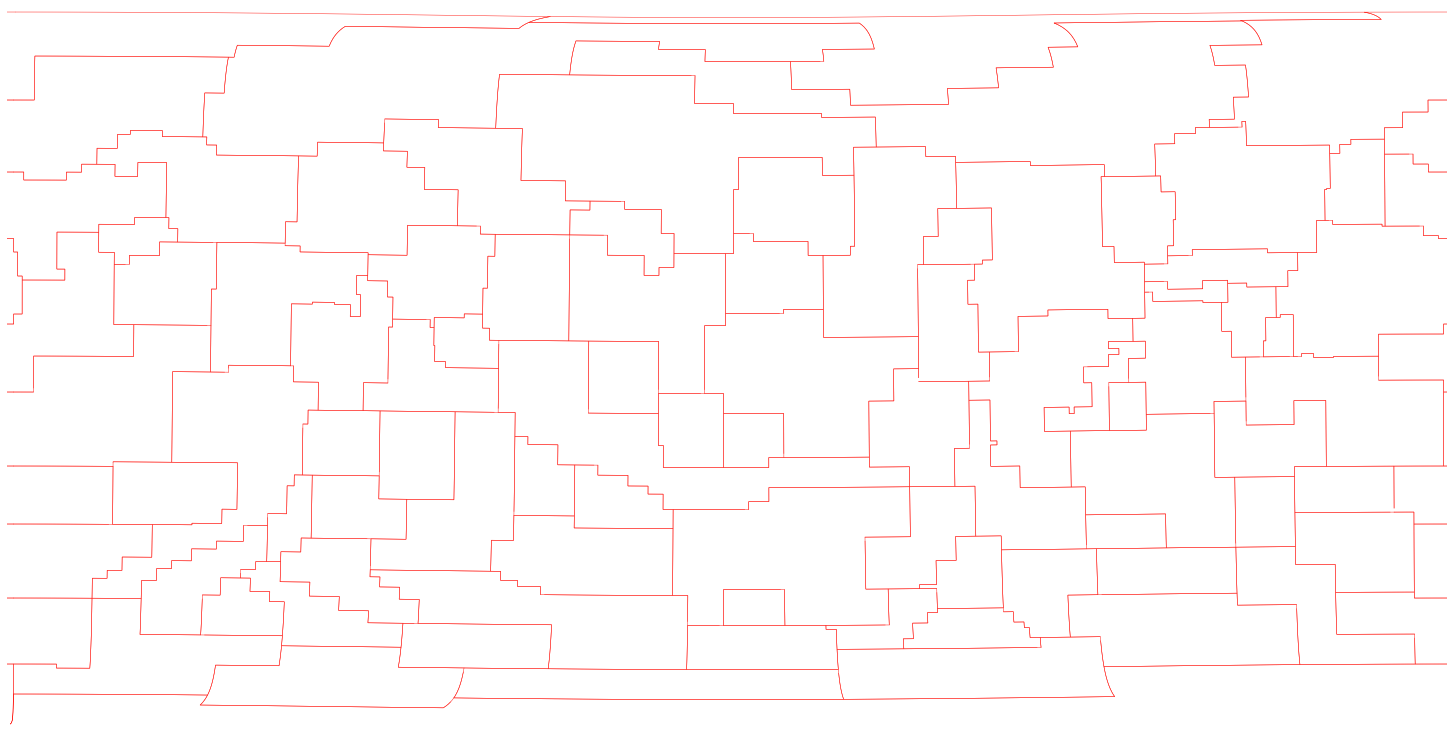

In [63]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=LowerThresholdPlateCarree(180))

for index, row in constellations.iterrows(): 
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=1, color=const_color)
    ax.background_patch.set_visible(False)
    

ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellations.png')

<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


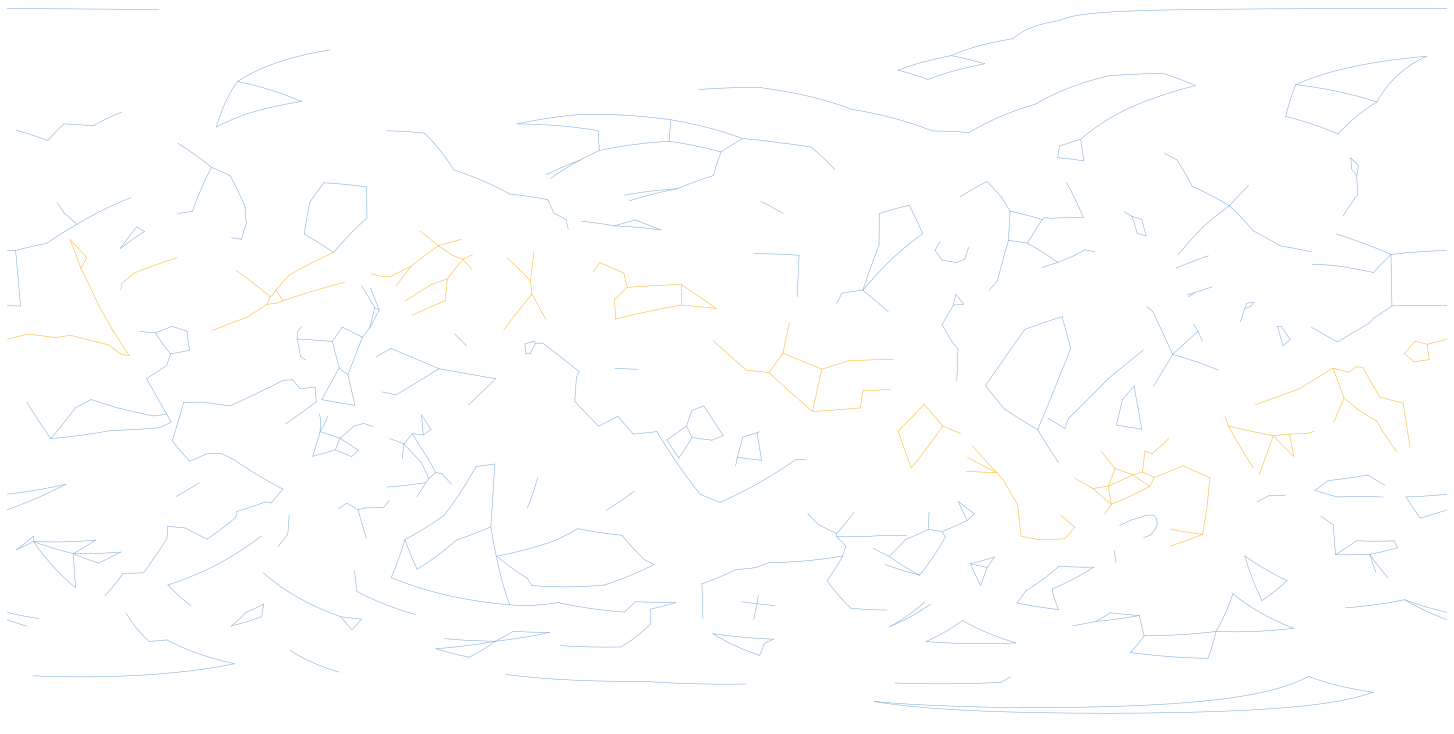

In [64]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=LowerThresholdPlateCarree(180))

for index, row in asterisms.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = nonzodiac_color
    if row['zodiac'] == True: 
        color = zodiac_color
    assert len(asterisms)%2 == 0
    for n in range(int(len(asterisms)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=0.5)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/asterisms.png')

<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


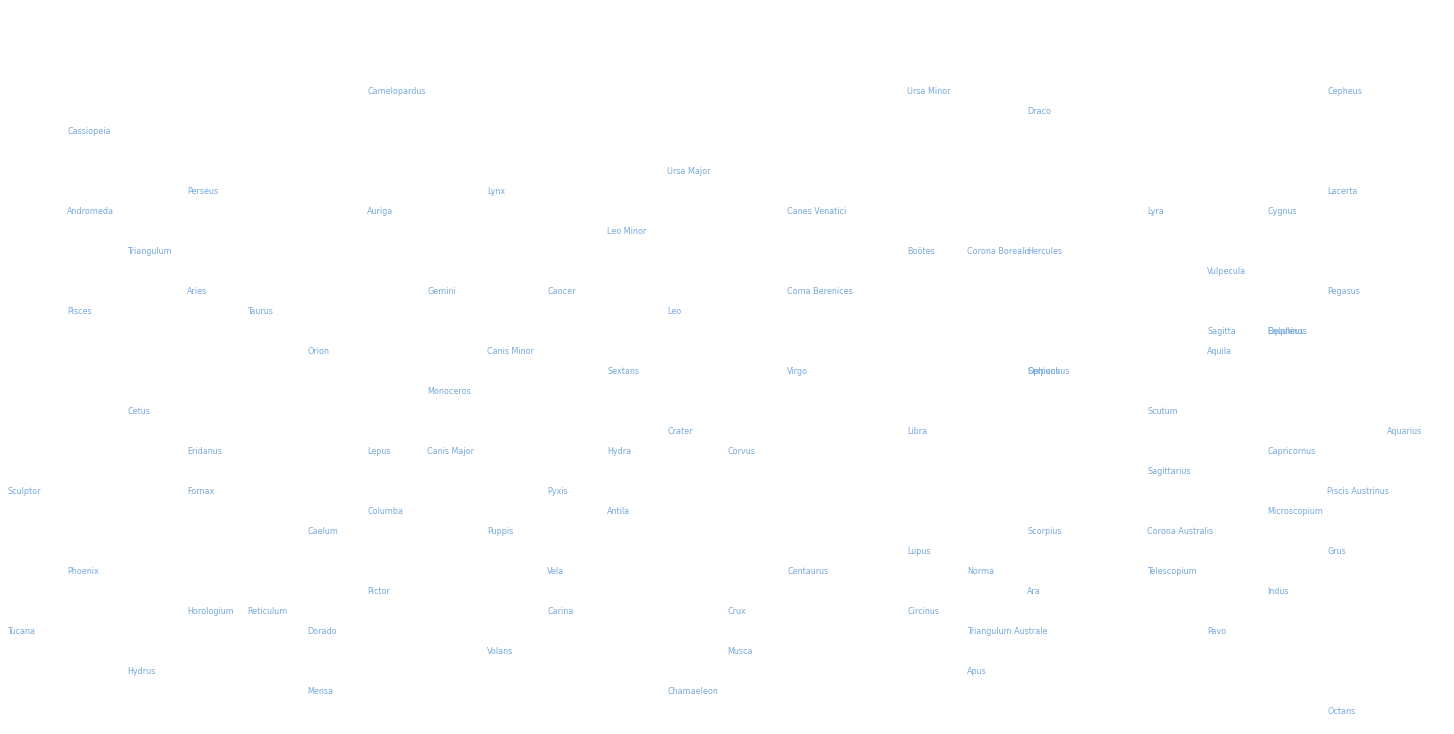

In [65]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

for index, row in const_names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name'], 
            transform=ccrs.Geodetic(), ha='left', va='top', fontsize=8, color=nonzodiac_color)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellation_names.pdf')
# ax_main.background_patch.set_visible(False)


1516 labeled stars to plot


<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


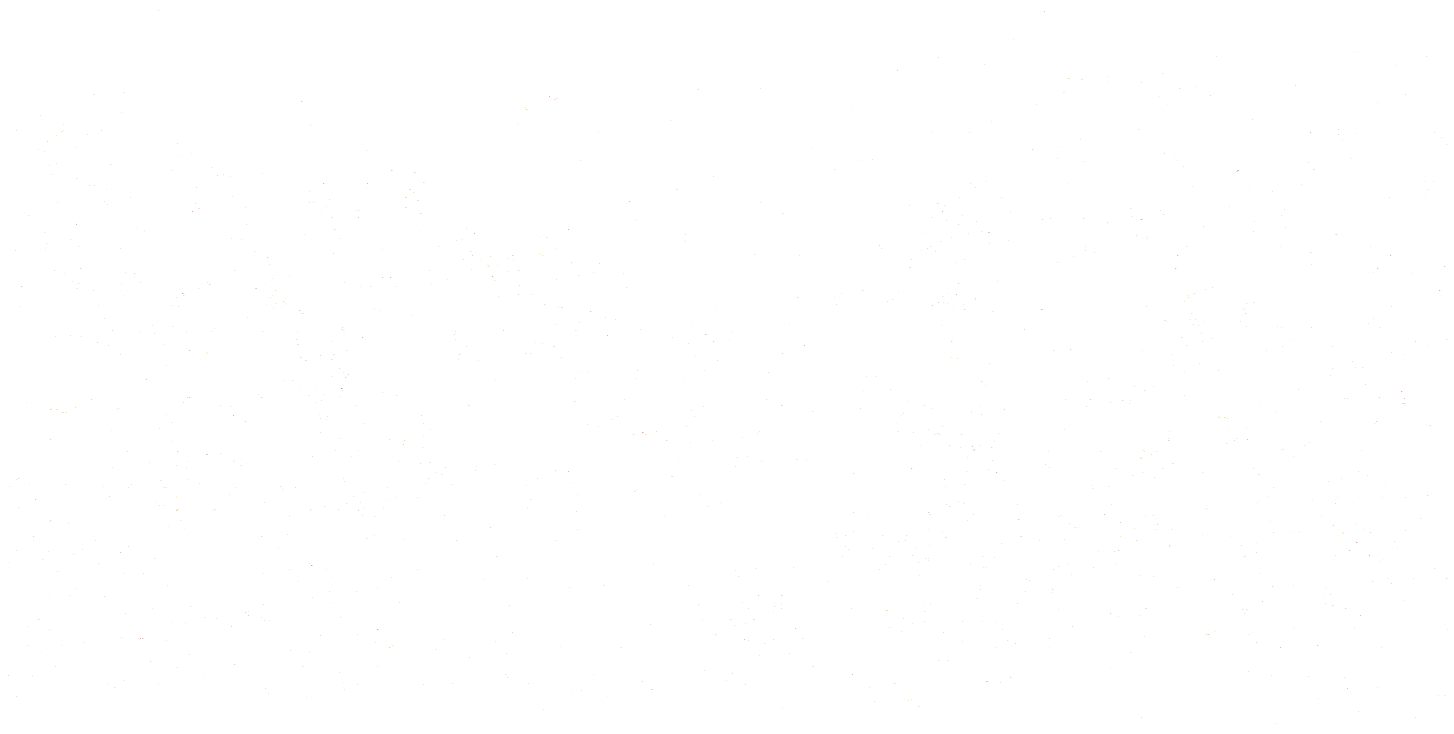

In [66]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

bayers = stars[pd.notnull(stars['bayer'])]
print(len(bayers), 'labeled stars to plot')

for index, row in bayers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['greek_letters'], transform=ccrs.Geodetic(), 
            ha='center', va='center', fontsize=2, color=row['linecolor'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/greek_letters.pdf')

131 labeled stars to plot


<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


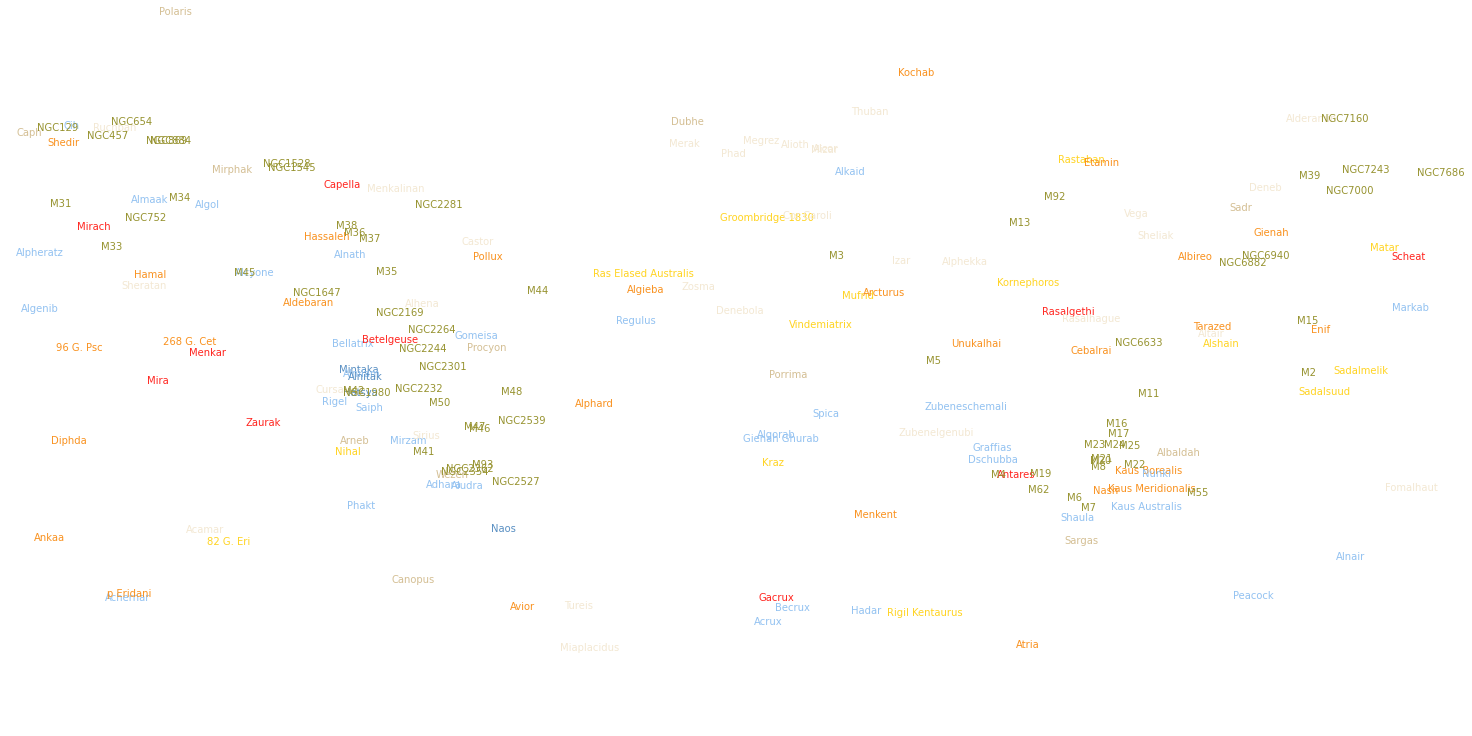

In [67]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

names = stars[pd.notnull(stars['proper'])]
print(len(names), 'labeled stars to plot')

for index, row in names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['proper'], color=row['linecolor'],
            ha='left', va='center', transform=ccrs.Geodetic())
    
for index, row in messiers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name'], color=other_color,
            ha='left', va='center', transform=ccrs.Geodetic())
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, '.names.pdf')

7717 non-variable stars to plot


<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


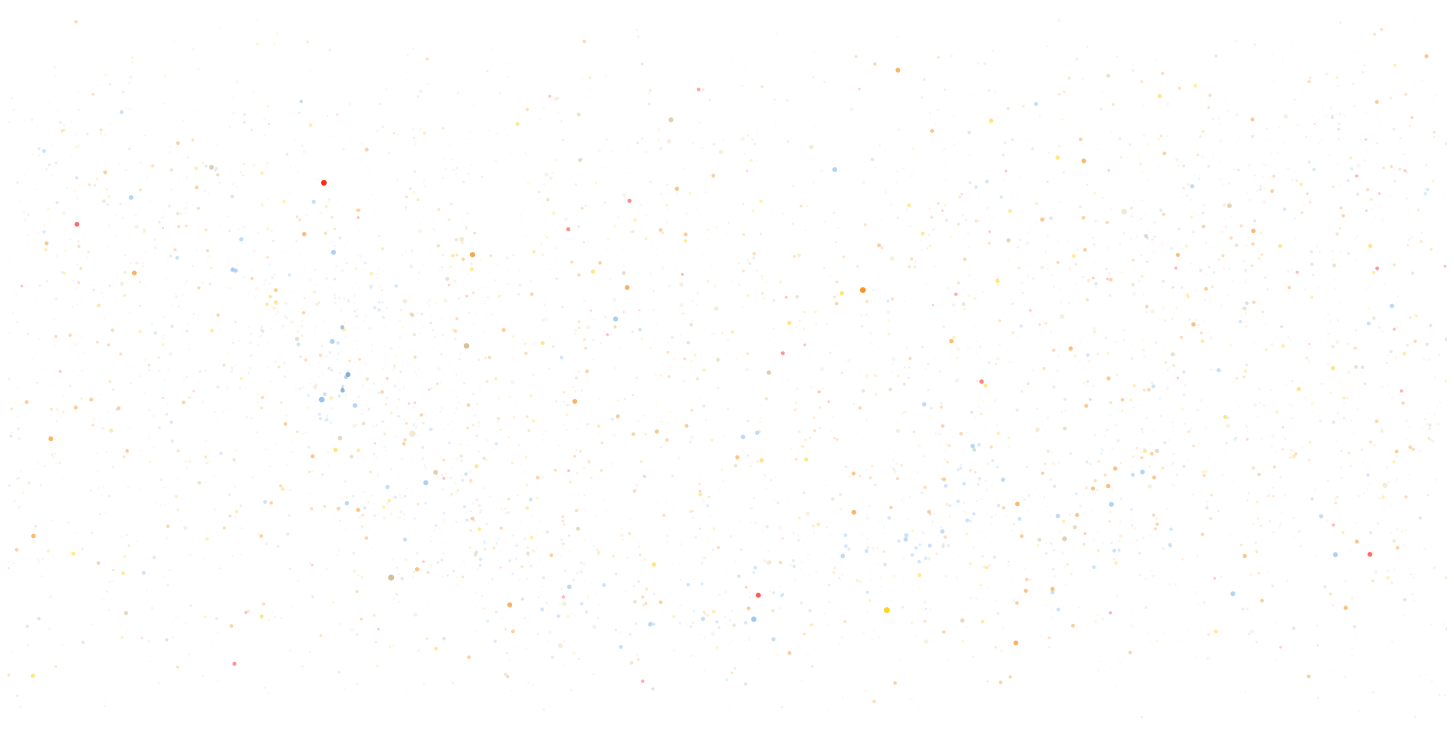

In [68]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

stars_nonvar = stars[pd.isnull(stars['var'])]
stars_nonvar = stars_nonvar[stars_nonvar['color'] != '#000000']
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(),
           s=(6.5-row['mag'])*5, color=row['color'], lw=0, edgecolor='none', 
           alpha=min(1, ((6.5-row['mag'])*5)/(6.5*5)), zorder=6.5-row['mag'])
    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_fills.png')

7723 non-variable stars to plot


<ipython-input-31-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


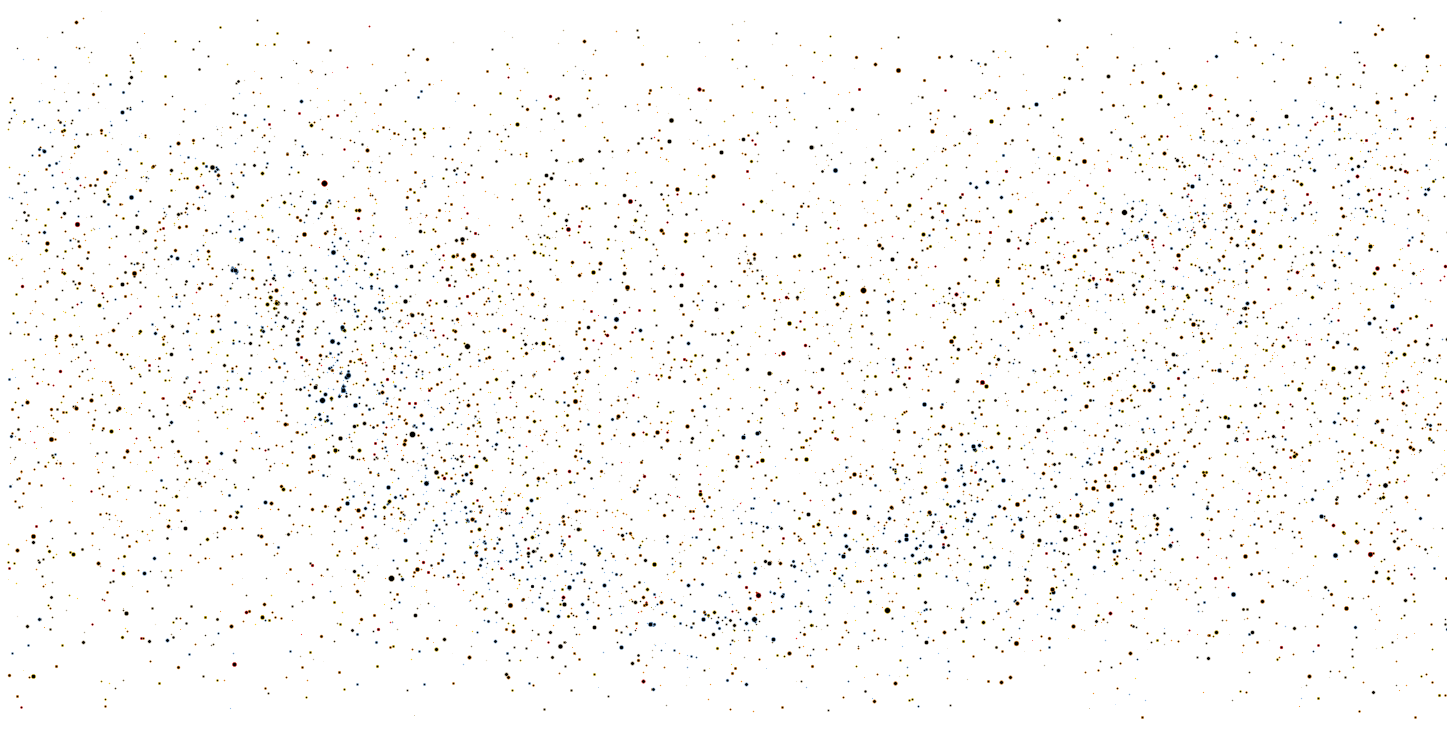

In [39]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

stars_nonvar = stars[pd.isnull(stars['var'])]
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(), alpha=1,
           s=(6.5-row['mag'])*5, edgecolor=row['color'], lw=0.5, color='k', zorder=6.5-row['mag'])
    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_lines.png')

<ipython-input-69-0828868baf97>:4: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


1189 variable stars to overplot


<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


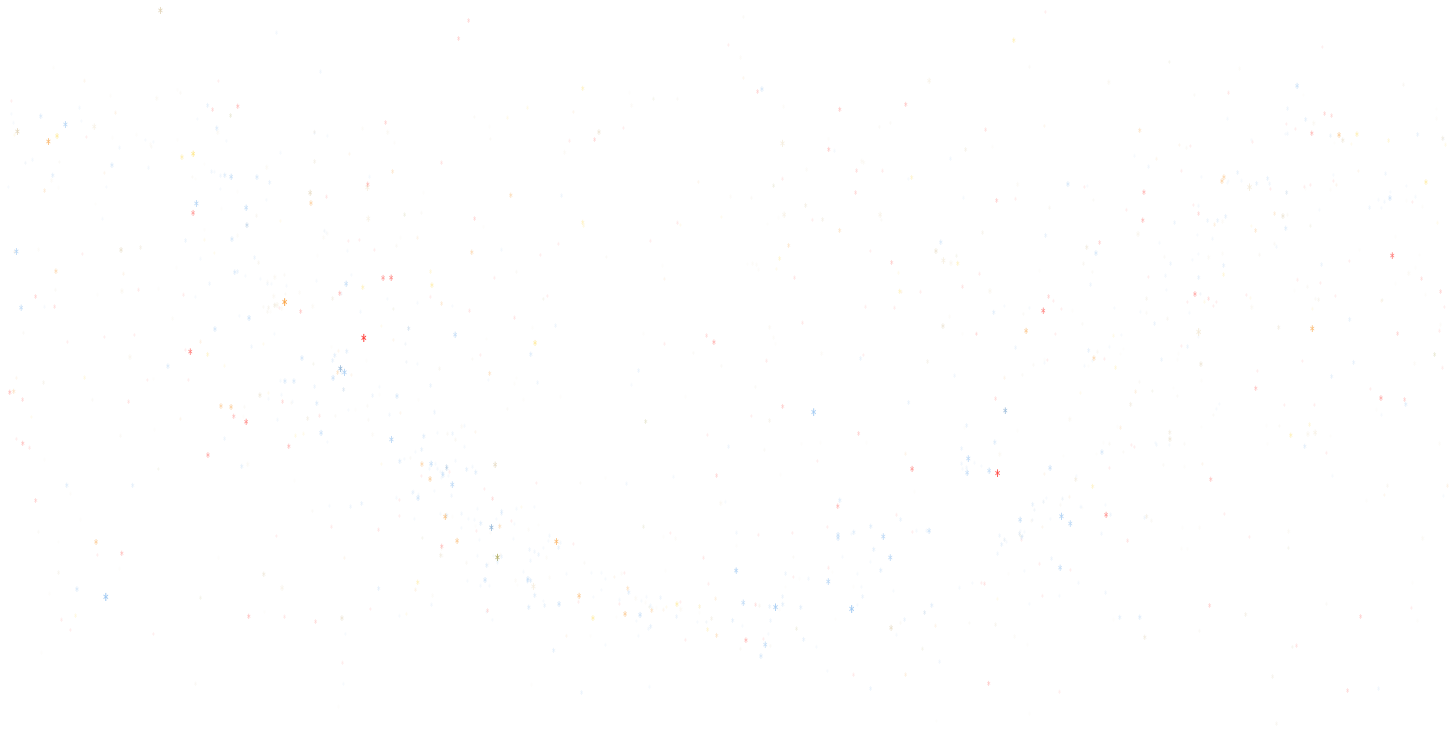

In [69]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))
ax.set_global()
ax.background_patch.set_fill(False)

stars_var = stars[pd.notnull(stars['var'])]
print(len(stars_var), 'variable stars to overplot')

for index, row in stars_var.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], u"\u16BC", transform=ccrs.Geodetic(),
            fontproperties=prop_seguihis, fontsize=(12-row['mag']), 
            alpha=max(0.1, min(1,((6.5-row['mag'])*5)/(6.5*5))), color=row['color'], ha='center', va='center')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.axis('off')
set_save_image(fig, './figures/variable_stars.png')

<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


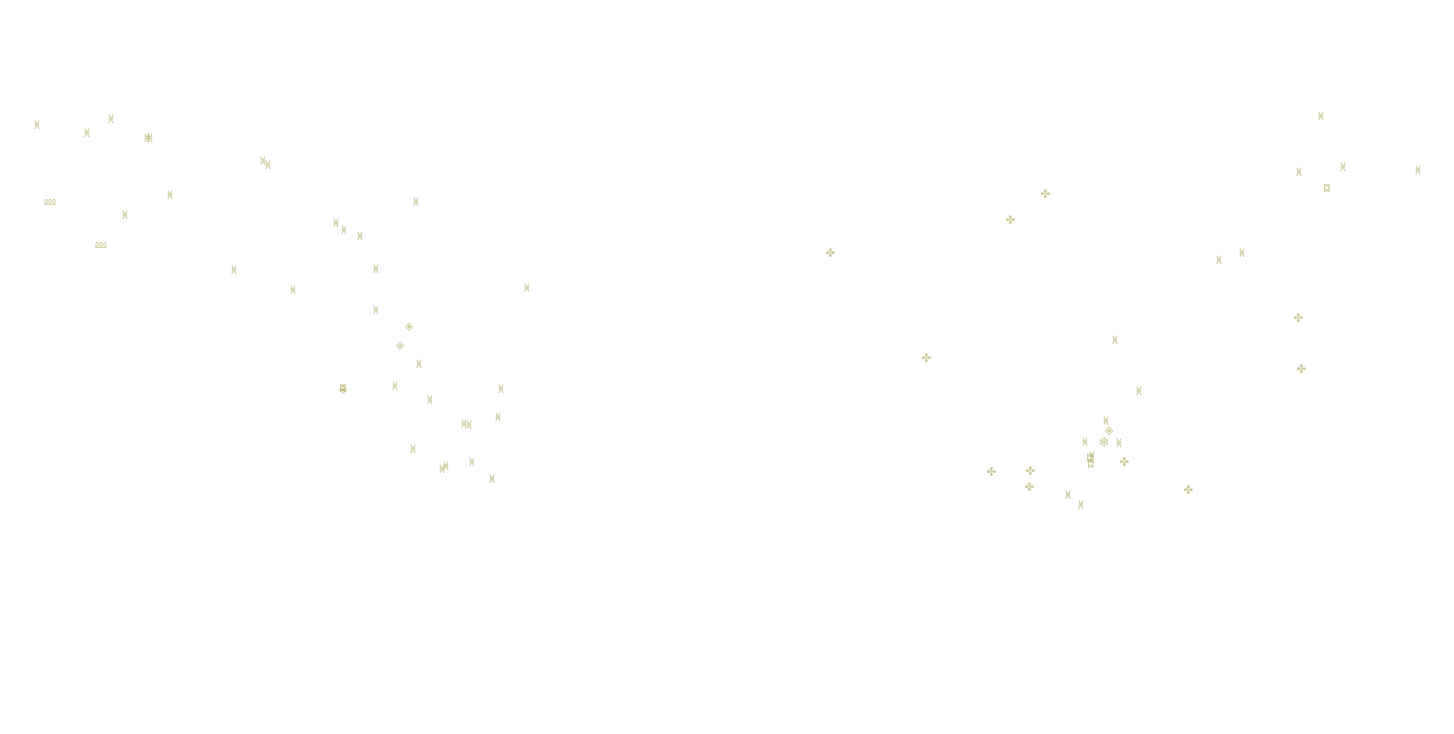

In [70]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

for index, row in messiers.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(row['ra']*360/24, row['dec'], row['code'], transform=ccrs.Geodetic(), alpha=0.5,
          fontsize=12, color=other_color, ha='center', va='center', fontproperties=fontprop)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/messier_ngcs.png')

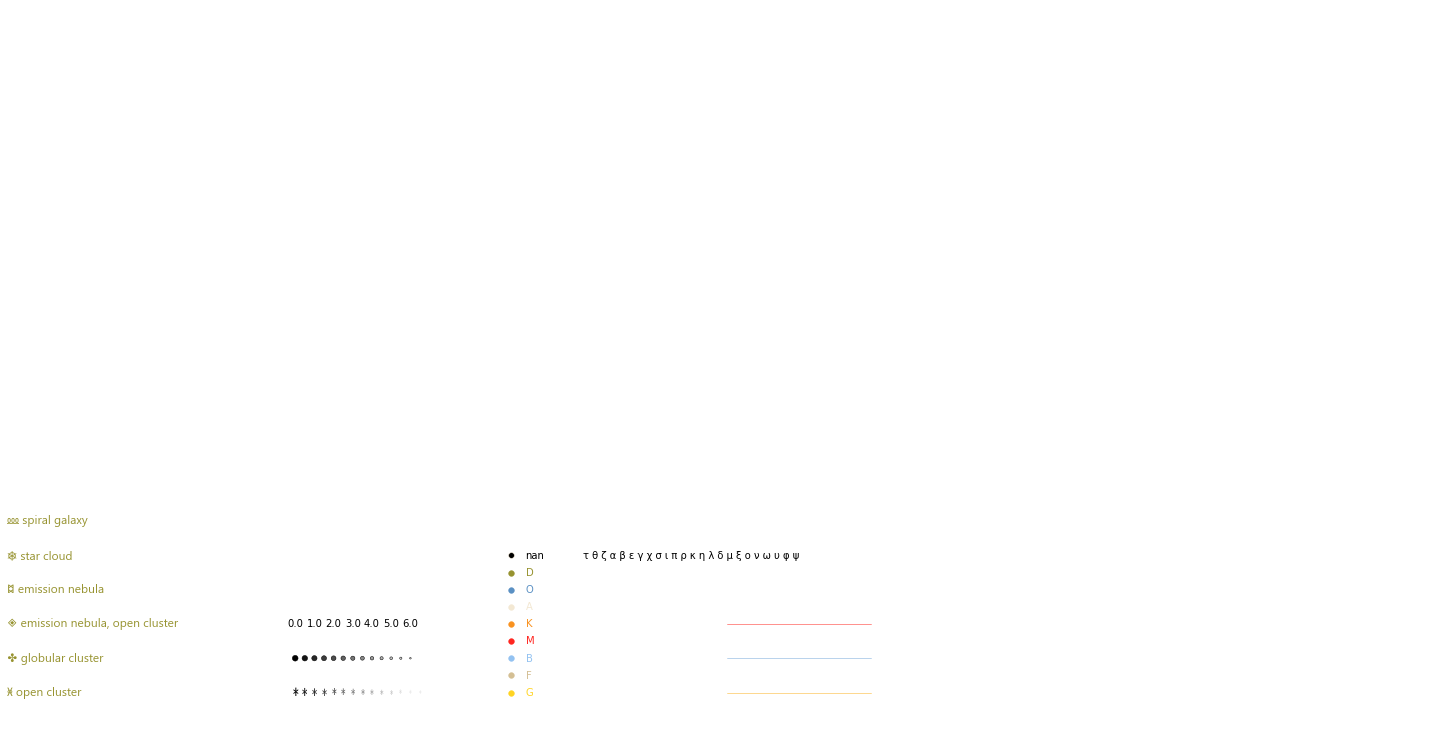

In [71]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Key for non-star object codes
codes = messiers.drop_duplicates(subset='type', keep='first')
codes.reset_index(inplace=True)
for index, row in codes.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(0, index, row['code']+" "+row['type'], alpha=1, fontsize=12, 
            color=other_color, ha='left', va='center', fontproperties=fontprop)
    
# Keys for star sizes
mags = np.arange(0, 6.55, 0.5)
for index, mag in enumerate(mags): 
    # Numbers
    if index % 2 == 0:
        ax.text(2+index/15, 2, mag, ha='center', va='center')
    
    # Key for variable star sizes
    ax.text(2+index/15, 0, u"\u16BC", fontproperties=prop_seguihis, fontsize=(12-mag), 
            alpha=max(0.1, min(1,((6.5-mag)*5)/(6.5*5))), color='k', ha='center', va='center')

    # Key for normal star sizes
    ax.scatter(2+index/15, 1, s=(6.5-mag)*5, color='k', lw=0, edgecolor='none', 
               alpha=min(1, ((6.5-mag)*5)/(6.5*5)))
    ax.scatter(2+index/15, 1, alpha=1, s=(6.5-mag)*5, edgecolor='k', lw=0.5, facecolor='none')

# Key for colors
cols = stars.drop_duplicates(subset='color', keep='first')
cols.reset_index(inplace=True)
for index, row in cols.iterrows(): 
    ax.scatter(3.5, index/2, s=6.5*5, lw=0.5, 
               edgecolor=row['linecolor'], color=row['color'])
    ax.text(3.6, index/2, row['spect_desig'], ha='left', va='center', color=row['color'])

# Key to zodiac colors
ax.plot([5, 6], [0, 0], color=zodiac_color, lw=0.5)
ax.plot([5, 6], [1, 1], color=nonzodiac_color, lw=0.5)
ax.plot([5, 6], [2, 2], color=const_color, lw=0.5)

# Key for colors
cols = stars.drop_duplicates(subset='greek_letters', keep='first')
cols.reset_index(inplace=True)
letterlist = cols['greek_letters'].tolist()
letterlist = [x for x in letterlist if len(str(x)) == 1]
letterlist = " ".join(letterlist)
ax.text(4, 4, letterlist, ha='left', va='center', color=row['color'])

ax.set_xlim(0, 10)
ax.set_ylim(-1, 20)
set_save_image(fig, './figures/key.pdf')

<ipython-input-72-478a0e11f609>:6: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)
<ipython-input-61-7ae959c4ef71>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


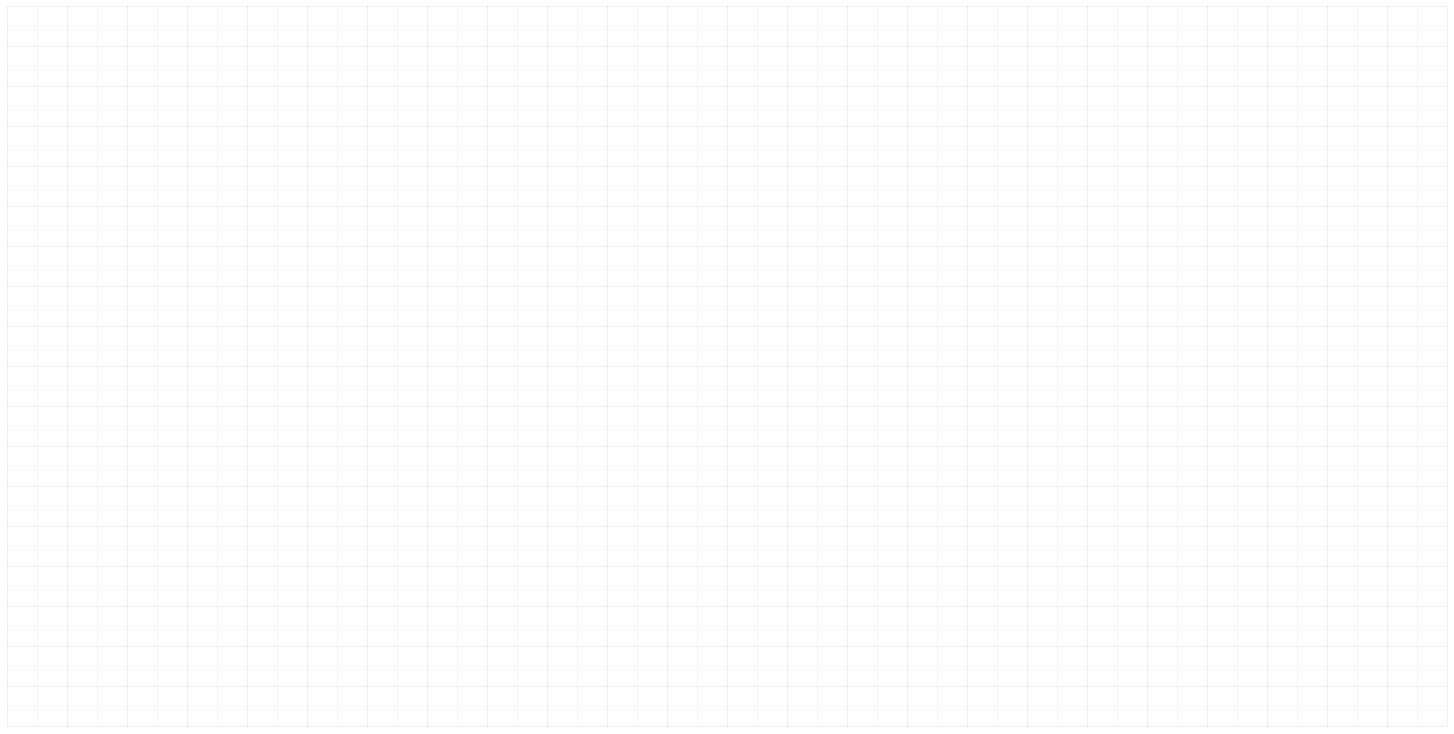

In [72]:
savename = './figures/gridlines.png'

fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.background_patch.set_fill(False)

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_delim = np.arange(-90, 90.01, 0.1)
lon_delim = np.arange(-180, 180.01, 0.1)

for lg in lat_large: 
    ax.plot(lon_delim, [lg]*len(lon_delim), transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot(lon_delim, [sm]*len(lon_delim), transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)
for lg in lon_large: 
    ax.plot([lg]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)

set_save_image(fig, savename)

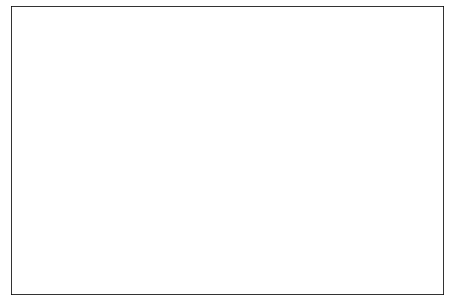

In [76]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

# Export text as editable text instead of shapes:
matplotlib.rcParams['pdf.fonttype'] = 42

# Preserve the vertical order of embedded images:
matplotlib.rcParams['image.composite_image'] = False

# Remove borders and ticks from subplots:
ax.axis('off')

# Remove padding and margins from the figure and all its subplots
plt.margins(0,0)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Save the Matplotlib figure as a PDF file:
pp = pdf.PdfPages('./savename.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

# If I don't need to edit vector paths I save the file as a
# PNG so I can import it directly into Photoshop:
plt.savefig('./savename.png', format='png', dpi=600, pad_inches=0, transparent=True)
